In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#Reading from CSV File and Storing in Dataframe
X_train = pd.read_csv('../../Dataset/x_train_all.csv')
y_train = pd.read_csv('../../Dataset/y_train_all.csv')
X_test = pd.read_csv('../../Dataset/x_test_all.csv')
y_test = pd.read_csv('../../Dataset/y_test_all.csv')

In [9]:
#Printing the shapes of the training
print("========================================")
print("=   Shape to train and test Dataset    =")
print("========================================")
print("= Shape of X_train is  :", X_train.shape)
print("= Shape of y_train is  :", y_train.shape)
print("= Shape of X_test is   :", X_test.shape)
print("= Shape of y_test is   :", y_test.shape)
print("========================================")

=   Shape to train and test Dataset    =
= Shape of X_train is  : (9690, 2304)
= Shape of y_train is  : (9690, 1)
= Shape of X_test is   : (3090, 2304)
= Shape of y_test is   : (3090, 1)


In [6]:
X_train_new, X_test_30 = train_test_split(X_train, test_size=0.3, random_state=42)

In [7]:
X_test_new = pd.concat([X_test, X_test_30], ignore_index=True)

In [10]:
y_train_new, y_test_30 = train_test_split(y_train, test_size=0.3, random_state=42)

In [11]:
y_test_new = pd.concat([y_test, y_test_30], ignore_index=True)

In [12]:
#Printing the shapes of the training
print("========================================")
print("=   Shape to train and test Dataset    =")
print("========================================")
print("= Shape of X_train is  :", X_train_new.shape)
print("= Shape of y_train is  :", y_train_new.shape)
print("= Shape of X_test is   :", X_test_new.shape)
print("= Shape of y_test is   :", y_test_new.shape)
print("========================================")

=   Shape to train and test Dataset    =
= Shape of X_train is  : (6783, 2304)
= Shape of y_train is  : (6783, 1)
= Shape of X_test is   : (5997, 2304)
= Shape of y_test is   : (5997, 1)


In [13]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy') 

In [21]:
# Train the classifier on the training set
clf.fit(X_train_new, y_train_new)

DecisionTreeClassifier(criterion='entropy')

In [22]:
# Predict on the training set
train_predictions = clf.predict(X_train_new)
train_accuracy = accuracy_score(y_train_new, train_predictions)
print(f"Accuracy on Training Set: {train_accuracy}")

Accuracy on Training Set: 1.0


In [23]:
# Predict on the testing set
test_predictions = clf.predict(X_test_new)
test_accuracy = accuracy_score(y_test_new, test_predictions)
print(f"Accuracy on Test Set: {test_accuracy}")

Accuracy on Test Set: 0.775554443888611


In [24]:
print(classification_report(y_test_new, test_predictions))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51       135
           1       0.78      0.81      0.79      1385
           2       0.80      0.83      0.81      1428
           3       0.79      0.77      0.78       876
           4       0.84      0.82      0.83      1247
           5       0.66      0.66      0.66       131
           6       0.66      0.59      0.62       190
           7       0.60      0.56      0.58       125
           8       0.72      0.74      0.73       308
           9       0.65      0.56      0.60       172

    accuracy                           0.78      5997
   macro avg       0.70      0.68      0.69      5997
weighted avg       0.77      0.78      0.77      5997



In [25]:
# Calculating precision, recall, and F1-score for each class
precision = precision_score(y_test_new, test_predictions, average=None)
recall = recall_score(y_test_new, test_predictions, average=None)
f1 = f1_score(y_test_new, test_predictions, average=None)

In [19]:
#Creating dataframe of precision, recall, and F1-score for each class
df = pd.DataFrame({'Precision': precision, 'F1 Score': f1, 'Recall': recall})
df

,Precision,F1 Score,Recall
0,0.516129,0.524590,0.533333
1,0.722938,0.750000,0.779167
2,0.757812,0.766798,0.776000
3,0.744344,0.737668,0.731111
4,0.808989,0.785659,0.763636
5,0.568627,0.522523,0.483333
6,0.436170,0.445652,0.455556
7,0.444444,0.380952,0.333333
8,0.618421,0.622517,0.626667
9,0.545455,0.502994,0.466667


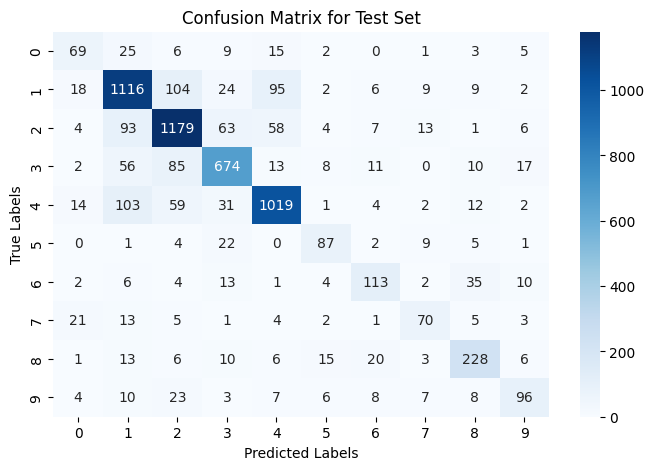

In [26]:
# Generate and visualize the confusion matrix for the test set
cm = confusion_matrix(y_test_new, test_predictions)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_train_new), yticklabels=np.unique(y_train_new))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()
